In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
%matplotlib inline

# 数据挖掘导论课程大作业
---
* 使用Haberman的生存数据集，对数据进行聚类
* 聚类评价指标
    根据样本的实际属于同一个类的情况和聚类成同一个簇的情况，可统计成下表。
    f00=具有不同的类和不同的簇的对象对的个数。
    f01=具有不同的类和相同的簇的对象对的个数。
    f10=具有相同的类和不同的簇的对象对的个数。
    f11=具有相同的类和相同的簇的对象对的个数。
    检验方法：
    * 兰德指数
    * Jaccard度量
    * t检验
* 要求：
    * 分别使用k-means 和 二分 k-means 进行聚类， 使用随机初始中心，分别取k-1、k、k+1为聚类个数，其中k为真实聚类个数。
    * 对每个聚类个数参数，执行k-means算法和二分k-means算法各50次（设置随机初始中心），计算聚类结果的兰德指数和Jaccard值，求出兰德指数和Jaccard值的平均值，填入表 1和表 2中。然后使用t检验分析两个算法结果的差异性，将结果并填入表 1和表 2中（需要附上t值和p值）。其中，k为真实的类别个数。
    * 选一次k-means算法和二分k-means的实验结果，绘制聚类结果散点图，每个类别使用不同的颜色。由于这两个数据的维度大于2，建议使用多个散点图对每两个特征组合的投影数据进行展示。


In [72]:
with open('haberman.data', 'rb') as f:
    data = [map(int, i.strip().split(',')) for i in f.readlines()]
print data[:3]

[[30, 64, 1, 1], [30, 62, 3, 1], [30, 65, 0, 1]]


# 数据内容
---
-  Title: Haberman's Survival Data

-  Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

-  Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

-  Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

-  Number of Instances: 306

-  Number of Attributes: 4 (including the class attribute)

-  Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

-  Missing Attribute Values: None


In [73]:
X = [i[:3] for i in data]
y = [i[3]-1 for i in data]
print X[:3], y[:3]

[[30, 64, 1], [30, 62, 3], [30, 65, 0]] [0, 0, 0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013CEB208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001469E240>]], dtype=object)

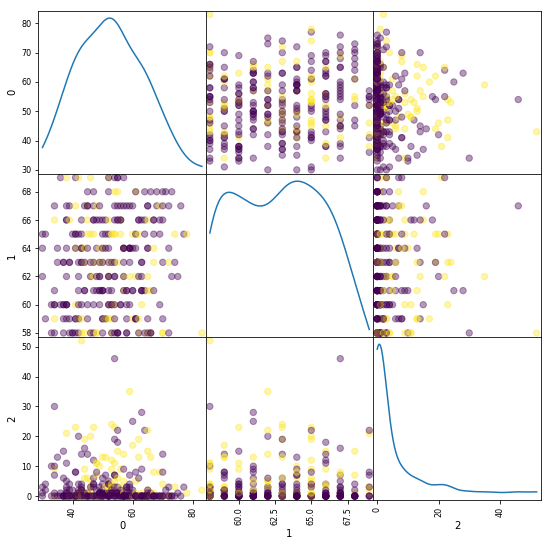

In [106]:
df = pd.DataFrame(X)
df['class'] = y
pd.scatter_matrix(df.iloc[:,:-1], figsize=(9, 9), \
                  diagonal='kde', marker='0', s=40, alpha=.4, c=df['class'])

In [93]:
y_pred = MiniBatchKMeans(n_clusters=2).fit_predict(np.mat(X), y)

In [94]:
print y_pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F24F3C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B64780>]], dtype=object)

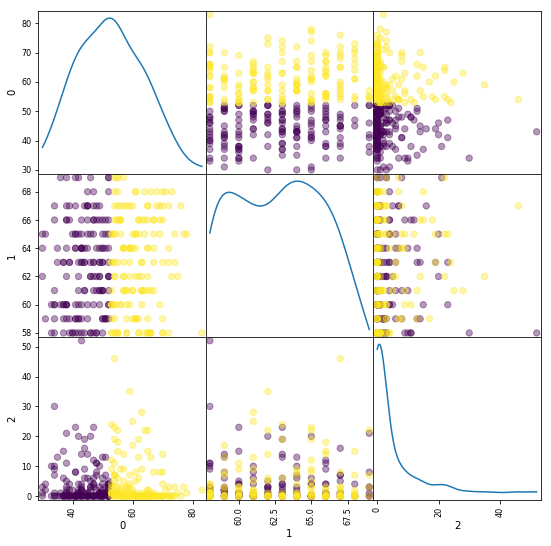

In [97]:
df = pd.DataFrame(X)
df['class'] = y_pred
pd.scatter_matrix(df.iloc[:,:-1], figsize=(9, 9), \
                  diagonal='kde', marker='o', s=40, alpha=.4, c=df['class'])

In [108]:
from sklearn import metrics
metrics.adjusted_rand_score(y_pred_reversal, np.array(y))

-0.0011018075368244579

In [96]:
print y_pred, np.array(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 